### After EDA, question to be answer using the given data

- What are the locations with the avg fastest roller coasters(Minimum 10)


## Importing Dependencies and Loading Data

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)

In [108]:
df = pd.read_csv('coaster_db.csv')

## Data Understanding

In [109]:
df.shape

(1087, 56)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

In [111]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in 2 rows for a total of 2 riders per train.,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in 2 rows for a total of 4 riders per train.,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [112]:
df.tail()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,NaN,Steel,Anton Schwarzkopf,55 in (140 cm),NaN,111 ft (34 m),3.0,Booster Wheel Lift Hill,NaN,3 trains with 5 cars. Riders are arranged 2 across in 2 rows for a total of 20 riders per train.,NaN,NaN,"1,500 riders per hour",4.7,Werner Stengel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Steel,NaN,53 mph,85 km/h,53.0,mph,53.0,111.0,ft,NaN,3,4.7
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,2022,Steel – Launched,Intamin,NaN,Blitz Coaster,178 ft (54 m),2.0,LSM,NaN,2 trains with 5 cars. Riders are arranged 2 across in 2 rows for a total of 20 riders per train.,NaN,NaN,NaN,NaN,NaN,95°,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,37.2339,-76.6426,Steel,2022-01-01,73 mph,117 km/h,73.0,mph,73.0,178.0,ft,NaN,2,NaN
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,NaN,"June 16, 2016",Steel – Launched,Vekoma,4[2] ft (122 cm),Motorbike roller coaster,78.1 ft (23.8 m),0.0,LIM Launch,NaN,7 trains with 7 cars. Riders are arranged 2 across in a single row for a total of 14 riders per train.,NaN,~2:00,"1,680 riders per hour",4,Walt Disney Imagineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Must transfer from wheelchair,Tron,Single rider line available,NaN,NaN,NaN,NaN,TRON Lightcycle / Run,2022,NaN,NaN,Steel,2016-06-16,59.3 mph,95.4 km/h,59.3,mph,59.3,78.1,ft,NaN,0,4.0
1085,Tumbili,770 ft (230 m),34 mph (55 km/h),Kings Dominion,Under construction,NaN,Steel – 4th Dimension – Wing Coaster,S&S – Sansei Technologies,NaN,4D Free Spin,112 ft (34 m),0.0,Vertical chain lift hill,NaN,Single car trains with riders arranged 4 across in 2 rows for a total of 8 riders per train,Jungle X-Pedition,0:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The Crypt,NaN,NaN,NaN,NaN,NaN,NaN,Official website,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Steel,NaN,34 mph,55 km/h,34.0,mph,34.0,112.0,ft,NaN,0,NaN
1086,Wonder Woman Flight of Courage,"3,300 ft (1,000 m)",58 mph (93 km/h),Six Flags Magic Mountain,Under construction,2022,Steel – Single-rail,Rocky Mountain Construction,NaN,Raptor – Custom,131 ft (40 m),3.0,Chain lift hill,NaN,NaN,DC Universe,NaN,NaN,NaN,NaN,87°,127 ft (39 m),NaN,NaN,Green Lantern: First Flight Tidal Wave,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,NaN,Steel,2022-01-01,58 mph,93 km/h,58.0,mph,58.0,131.0,ft,NaN,3,NaN


In [113]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [114]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


## Data Preparation

In [115]:
df.isnull().sum()/len(df)*100

coaster_name                      0.000000
Length                           12.327507
Speed                            13.799448
Location                          0.000000
Status                           19.595216
Opening date                     22.999080
Type                              0.000000
Manufacturer                      5.427783
Height restriction               23.551058
Model                            31.554738
Height                           11.223551
Inversions                       14.259430
Lift/launch system               26.862925
Cost                             64.857406
Trains                           33.946642
Park section                     55.197792
Duration                         29.622815
Capacity                         47.102116
G-force                          66.697332
Designer                         46.826127
Max vertical angle               67.157314
Drop                             54.553818
Soft opening date                91.168353
Fast Lane a

In [116]:
# Dropping the columns with 50% of null values
null_val = df.isnull().sum() / len(df)

null_cols = null_val[null_val > 0.30].index.tolist()

df.drop(null_cols, axis=1, inplace=True)

In [117]:
df.shape

(1087, 26)

In [118]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Height,Inversions,Lift/launch system,Duration,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,Inversions_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,50 ft (15 m),NaN,gravity,1:00,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,0
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,1.0,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,1.0,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,1.0,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [119]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Height', 'Inversions',
       'Lift/launch system', 'Duration', 'year_introduced', 'latitude',
       'longitude', 'Type_Main', 'opening_date_clean', 'speed1', 'speed2',
       'speed1_value', 'speed1_unit', 'speed_mph', 'height_value',
       'height_unit', 'Inversions_clean'],
      dtype='object')

In [120]:
df_new = df[['coaster_name', 'Length', 'Speed', 'Location', 'Status',
       'Type', 'Manufacturer', 'Height', 'Inversions', 'Duration', 'year_introduced', 'latitude',
       'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph', 'height_value', 'Inversions_clean']].copy()

In [121]:
df_new.shape

(1087, 18)

In [122]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   coaster_name        1087 non-null   object 
 1   Length              953 non-null    object 
 2   Speed               937 non-null    object 
 3   Location            1087 non-null   object 
 4   Status              874 non-null    object 
 5   Type                1087 non-null   object 
 6   Manufacturer        1028 non-null   object 
 7   Height              965 non-null    object 
 8   Inversions          932 non-null    float64
 9   Duration            765 non-null    object 
 10  year_introduced     1087 non-null   int64  
 11  latitude            812 non-null    float64
 12  longitude           812 non-null    float64
 13  Type_Main           1087 non-null   object 
 14  opening_date_clean  837 non-null    object 
 15  speed_mph           937 non-null    float64
 16  height

In [126]:
#Lets just renames few columns 

df_new = df_new.rename(columns={'opening_date_clean':'Opening_date','Inversions_clean':'Inversions','coaster_name':'Coaster_Name','year_introduced':'Year_Introduced'})

In [127]:
df_new.columns

Index(['Coaster_Name', 'Length', 'Speed', 'Location', 'Status', 'Type',
       'Manufacturer', 'Height', 'Inversions', 'Duration', 'Year_Introduced',
       'latitude', 'longitude', 'Type_Main', 'Opening_date', 'speed_mph',
       'height_value', 'Inversions'],
      dtype='object')

In [129]:
#we can also see that the data type of opening date is obj not datetime. Lets change that too

df_new['Opening_date'] = pd.to_datetime(df_new['Opening_date'])

In [131]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1087 entries, 0 to 1086
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Coaster_Name     1087 non-null   object        
 1   Length           953 non-null    object        
 2   Speed            937 non-null    object        
 3   Location         1087 non-null   object        
 4   Status           874 non-null    object        
 5   Type             1087 non-null   object        
 6   Manufacturer     1028 non-null   object        
 7   Height           965 non-null    object        
 8   Inversions       932 non-null    float64       
 9   Duration         765 non-null    object        
 10  Year_Introduced  1087 non-null   int64         
 11  latitude         812 non-null    float64       
 12  longitude        812 non-null    float64       
 13  Type_Main        1087 non-null   object        
 14  Opening_date     837 non-null    datetim

In [132]:
#Checking for duplicates

df_new.loc[df_new.duplicated()]

,Coaster_Name,Length,Speed,Location,Status,Type,Manufacturer,Height,Inversions,Duration,Year_Introduced,latitude,longitude,Type_Main,Opening_date,speed_mph,height_value,Inversions


In [136]:
#we can see that there are no duplicated but lets check it using the subset options.

df_new.loc[df_new.duplicated(subset=['Coaster_Name'])]

,Coaster_Name,Length,Speed,Location,Status,Type,Manufacturer,Height,Inversions,Duration,Year_Introduced,latitude,longitude,Type_Main,Opening_date,speed_mph,height_value,Inversions
43,Crystal Beach Cyclone,"2,953 ft (900 m)",60 mph (97 km/h),Crystal Beach Park,Removed,Wood,Traver Engineering,96 ft (29 m),NaN,1:10,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,96.0,0
60,Derby Racer,NaN,NaN,Revere Beach,Removed,Wood – Racing,Fred W. Pearce,NaN,0.0,NaN,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0
61,Blue Streak (Conneaut Lake),"2,900 ft (880 m)",50 mph (80 km/h),Conneaut Lake Park,Closed,Wood,NaN,77 ft (23 m),0.0,2:20,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,77.0,0
167,Big Thunder Mountain Railroad,NaN,35 mph (56 km/h),Other,NaN,Steel – Mine Train,"Arrow Development (California and Florida)Dynamic Structures (2014 California rebuild)Vekoma (Paris, Tokyo)",104 ft (32 m),0.0,~3:00,1980,NaN,NaN,Steel,NaT,35.0,104.0,0
237,Thunder Run (Canada's Wonderland),"330 m (1,080 ft)",64 km/h (40 mph),Canada's Wonderland,Operating,Steel – Powered – Mine Train,Mack Rides,10 m (33 ft),0.0,1:24,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,262.5 ft (80.0 m),NaN,Six Flags Great Adventure,Operating,Steel – Kiddie,Zamperla,13 ft (4.0 m),0.0,0:40,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,13.0,0
1064,Little Dipper (Conneaut Lake Park),NaN,NaN,Conneaut Lake Park,Operating,Steel,Allan Herschell Company,NaN,NaN,NaN,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0
1080,Iron Gwazi,"4,075 ft (1,242 m)",76 mph (122 km/h),Busch Gardens Tampa Bay,Under construction,Steel – Wooden,Rocky Mountain Construction,206 ft (63 m),2.0,1:50,2022,28.0339,-82.4231,Steel,NaT,76.0,206.0,2
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,Steel,Anton Schwarzkopf,111 ft (34 m),3.0,NaN,2022,NaN,NaN,Steel,NaT,53.0,111.0,3


In [139]:
#There are 97 duplicated row 
df_new.query('Coaster_Name == "Derby Racer"')

,Coaster_Name,Length,Speed,Location,Status,Type,Manufacturer,Height,Inversions,Duration,Year_Introduced,latitude,longitude,Type_Main,Opening_date,speed_mph,height_value,Inversions
14,Derby Racer,NaN,NaN,Revere Beach,Removed,Wood – Racing,Fred W. Pearce,NaN,0.0,NaN,1911,42.42,-70.986,Wood,1911-01-01,NaN,NaN,0
60,Derby Racer,NaN,NaN,Revere Beach,Removed,Wood – Racing,Fred W. Pearce,NaN,0.0,NaN,1937,42.42,-70.986,Wood,1911-01-01,NaN,NaN,0


In [145]:
df_ = df_new.loc[~df_new.duplicated(subset=['Coaster_Name','Location','Opening_date'])].reset_index(drop=True)

In [146]:
df_.shape

(990, 18)

## Univariate Analysis

Text(0, 0.5, 'Count')

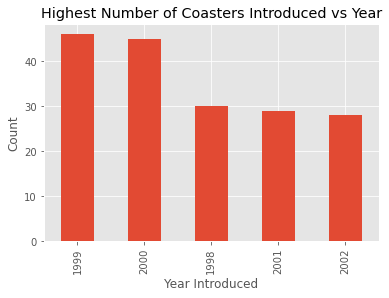

In [153]:
grp = df_['Year_Introduced'].value_counts().head().plot(kind='bar', title='Highest Number of Coasters Introduced vs Year')

grp.set_xlabel("Year Introduced")
grp.set_ylabel("Count")

<AxesSubplot:title={'center':'Speed(mph)'}, ylabel='Density'>

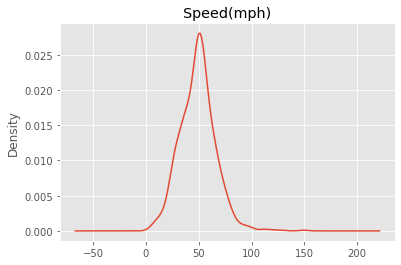

In [160]:
df_['speed_mph'].plot(kind='kde', title='Speed(mph)')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


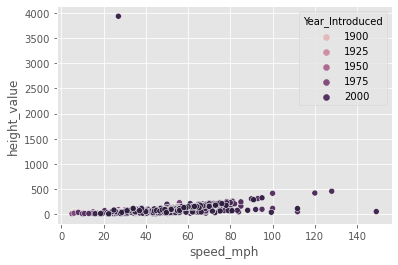

In [165]:
sns.scatterplot(df_['speed_mph'],df_['height_value'], hue=df_['Year_Introduced'])
plt.show()

<AxesSubplot:>

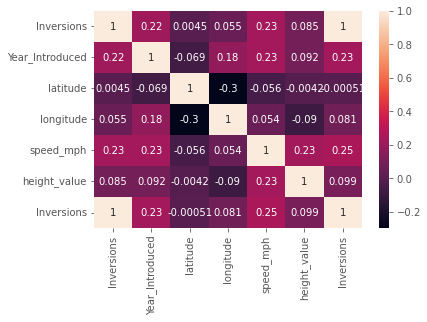

In [169]:
sns.heatmap(df_.corr(), annot=True)

### Ananlysis - Answer

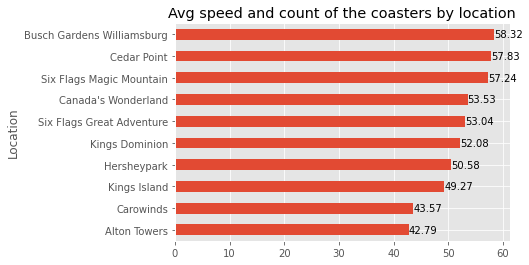

In [182]:
df_.query('Location != "Other"').groupby('Location')['speed_mph'].agg(['mean','count']).query('count >= 10').sort_values('mean')['mean'].plot(kind='barh', title='Avg speed and count of the coasters by location')

for i, v in enumerate(df_.query('Location != "Other"').groupby('Location')['speed_mph'].agg(['mean','count']).query('count >= 10').sort_values('mean')['mean']):
    plt.annotate(str(round(v, 2)), xy=(v, i), color='black', va='center')
    
plt.show()